## Importar librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
import openpyxl
import gdown

C:\Users\luimi\AppData\Local\Temp\ipykernel_9240\534785282.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Subir archivo a Drive

In [2]:
from utils.upload_file import upload_file

path_file = './dataframe/online_retail_II.xlsx'
parent_id = '1rDRjiA5qHdBxulee915IdT6_2WRG4xuk'

upload_file(path_file, parent_id)

El archivo: online_retail_II.xlsx se subio con exito


## Crear Dataframe

In [4]:
# ID del archivo en Drive
file_id = '1_goZvgd78oneHia_huPS6JIERpE1XrCD'

URL = f'https://drive.google.com/uc?id={file_id}'

# Descarga el archivo en memoria
content = gdown.download(URL,quiet=False)

xls = pd.ExcelFile(content)

df_sheet1 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df_sheet2 = pd.read_excel(xls, sheet_name='Year 2010-2011')

df = pd.concat([df_sheet1,df_sheet2], ignore_index=True)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1_goZvgd78oneHia_huPS6JIERpE1XrCD
To: d:\prueba-tecnica-i2ds\online_retail_II.xlsx
100%|██████████| 45.6M/45.6M [00:12<00:00, 3.61MB/s]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Manipulación de datos

### Agrupación y Ordenamiento

In [5]:
total_sell = df.groupby('Description')['Price'].sum().reset_index().sort_values(by='Price',ascending=False)
total_sell.head()

,Description,Price
2991,Manual,751406.15
238,AMAZON FEE,328781.84
1472,DOTCOM POSTAGE,322667.49
3689,POSTAGE,69226.69
3915,REGENCY CAKESTAND 3 TIER,61747.01


### Filtrado

In [6]:
price_greater_10 = df[df['Price'] > 10]
price_greater_10.head().sort_values(by='Price', ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
140,489445,21299,EDWARDIAN TOILET ROLL UNIT,1,2009-12-01 09:57:00,12.75,17519.0,United Kingdom
172,489446,85066,CREAM SWEETHEART MINI CHEST,2,2009-12-01 10:06:00,12.75,13758.0,United Kingdom


### Realizar un análisis para determinar el país que más productos consume. Puedes utilizar las columnas "País" y "Cantidad" del conjunto de datos para determinar esto.

In [7]:
top_5_consumption_country = df.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
top_5_consumption_country.head()

,Country,Quantity
40,United Kingdom,8692875
26,Netherlands,381951
11,EIRE,331341
10,Denmark,235218
15,Germany,224581


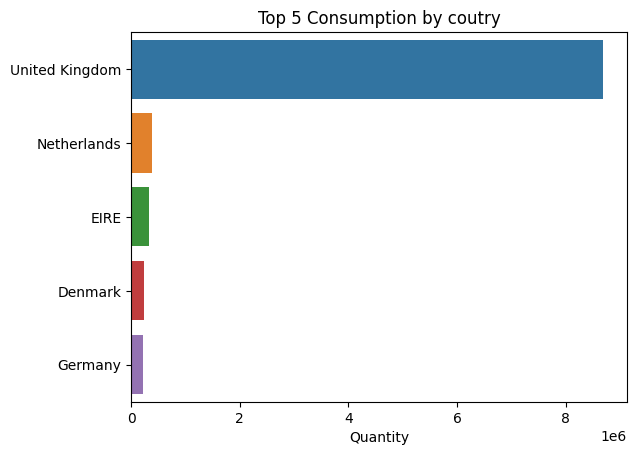

In [8]:
sns.barplot(
    x='Quantity',
    y='Country',
    data=top_5_consumption_country.head(),
    hue='Country',
    )

plt.ylabel('')
plt.title('Top 5 Consumption by coutry');

### Realizar un análisis para identificar los productos más vendidos o los más populares en términos de ganancias o cantidad de ventas.


In [9]:
sales_by_product = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
sales_by_product.head()

,Description,Quantity
5388,WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
5266,WHITE HANGING HEART T-LIGHT HOLDER,93050
328,ASSORTED COLOUR BIRD ORNAMENT,81306
2508,JUMBO BAG RED RETROSPOT,78090
801,BROCADE RING PURSE,70700


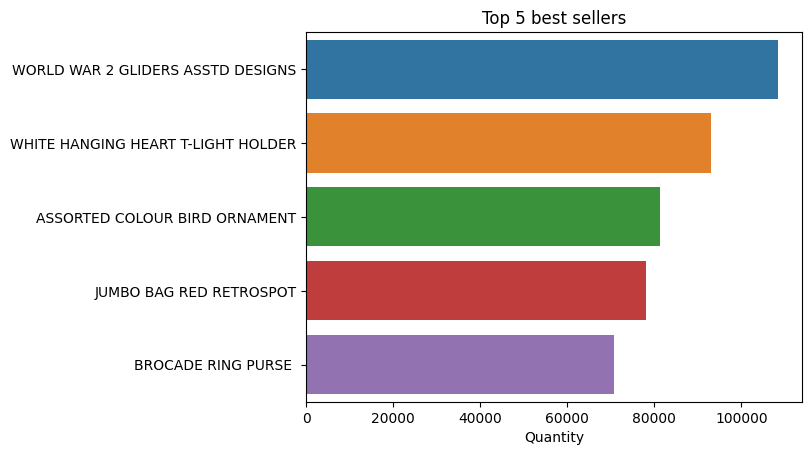

In [10]:
sns.barplot(
    data=sales_by_product.head(),
    x='Quantity',
    y='Description',
    hue='Description'
    )
plt.ylabel('')
plt.title('Top 5 best sellers');

### Analizar el conjunto de datos para detectar patrones y tendencias, por ejemplo, identificar si hay picos de ventas durante ciertos meses del año

In [11]:
#convertir a formato fecha (datetime) YY/MM/DD HH:MM:SS
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# creando columna año
df['Year'] = df['InvoiceDate'].dt.year

total_sales_year = df.groupby('Year')['Price'].sum().reset_index().sort_values(by='Price', ascending=True)
total_sales_year

,Year,Price
0,2009,198307.760
2,2011,2238301.124
1,2010,2526012.744


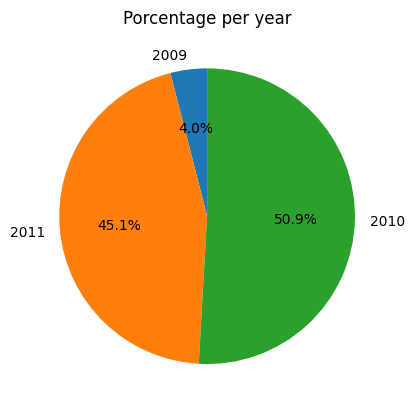

In [12]:
plt.pie(
    total_sales_year['Price'],
    labels=total_sales_year['Year'],
    autopct='%1.1f%%', 
    startangle=90,
    )
plt.title('Porcentage per year');

In [13]:
import calendar

# Crear columna Mes
df['Month'] = df['InvoiceDate'].dt.month

# Crear columna nombre mes
df['Month Name'] = df['Month'].apply(lambda x: calendar.month_name[x])

sales_2010 = df[df['Year'] == 2010]

sales_month = sales_2010.groupby(['Month', 'Month Name'])['Price'].sum().reset_index()
sales_month = sales_month.sort_values(by=['Month', 'Month Name'])
sales_month = sales_month[['Month Name', 'Price']]
sales_month

,Month Name,Price
0,January,165671.362
1,February,116774.536
2,March,268304.241
3,April,120708.372
4,May,142885.530
5,June,234869.690
6,July,100650.900
7,August,157778.090
8,September,223763.221
9,October,265973.340


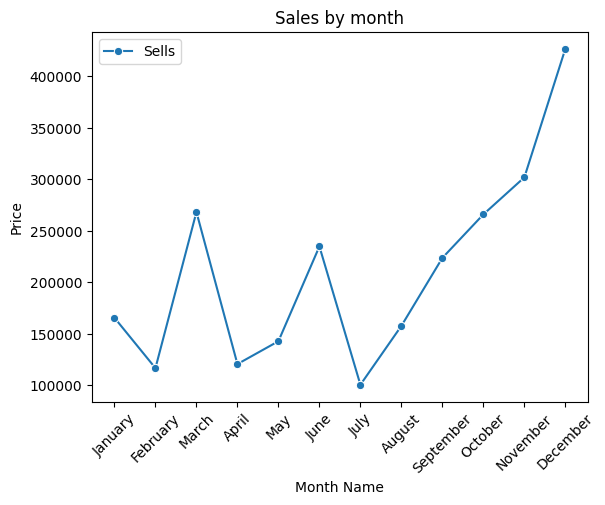

In [14]:
sns.lineplot(
    x=sales_month['Month Name'],
    y=sales_month['Price'],
    marker='o',
    label='Sells'  
)

plt.xticks(rotation=45)
plt.title('Sales by month');

### Realizar un análisis de correlación para determinar la relación entre las variables, por ejemplo, si existe una correlación entre el precio y la cantidad de ventas.

<Axes: >

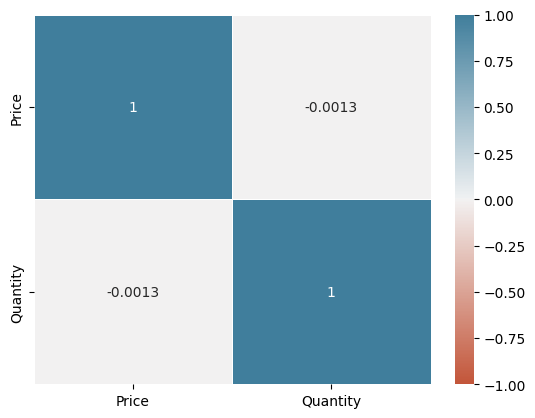

In [18]:
price_quantity_corr = df[['Price','Quantity']].corr()

sns.heatmap(
    data=price_quantity_corr,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)
